
<h1 style="color:green; text-align:center;margin-top:5%">
    Baggin & Random forest 
</h1>

---

<p style="text-align:center; font-size:17px">
    Anthony de los Santos
</p>


<h2 style="padding:2%;margin-left:2%; font-size:20px"> 
    <b style="color:green">+</b> Baggin, Boostrap agregation.
</h2>
 
 

In [1]:
# import de paquetes 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# paquete para trabajar con árboles de decisión 

from sklearn import tree

# Para dividir nuestro dataset en Train_set, test_set. 

from sklearn.model_selection import train_test_split


### Baggin aplicado en "Hitters.csv" 



In [2]:
# Cargamos el dataset 

hitters = pd.read_csv("Hitters.csv")

hitters.head()



,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [3]:
#
# Habrá que filtrar los datos faltantes en "Salary" y después de eso, aplicar log()
#

# Se filtran los datos "Nan"
hitters = hitters.dropna()  

# Se agrega una columna a nuestro dataSet, "logSalary", que resulta de aplicar log( "Salary" )
logSalary = pd.DataFrame({"logSalary" : hitters["Salary"].transform( np.log )})
hitters = hitters.join( logSalary )

hitters.head()



,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,...,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague,logSalary
1,315,81,7,24,38,39,14,3449,835,69,...,414,375,N,W,632,43,10,475.0,N,6.163315
2,479,130,18,66,72,76,3,1624,457,63,...,266,263,A,W,880,82,14,480.0,A,6.173786
3,496,141,20,65,78,37,11,5628,1575,225,...,838,354,N,E,200,11,3,500.0,N,6.214608
4,321,87,10,39,42,30,2,396,101,12,...,46,33,N,E,805,40,4,91.5,N,4.516339
5,594,169,4,74,51,35,11,4408,1133,19,...,336,194,A,W,282,421,25,750.0,A,6.620073


In [4]:
#
#     Train test split 
#

X = pd.DataFrame({ "Puntos": hitters["Hits"], "Años": hitters["Years"] })
y = hitters["logSalary"] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 1)

 

[Text(167.4, 181.2, 'X[1] <= 4.5\nmse = 0.788\nsamples = 263\nvalue = 5.927'),
 Text(83.7, 108.72, 'X[0] <= 15.5\nmse = 0.471\nsamples = 90\nvalue = 5.107'),
 Text(41.85, 36.23999999999998, 'mse = 0.176\nsamples = 2\nvalue = 7.243'),
 Text(125.55000000000001, 36.23999999999998, 'mse = 0.371\nsamples = 88\nvalue = 5.058'),
 Text(251.10000000000002, 108.72, 'X[0] <= 117.5\nmse = 0.42\nsamples = 173\nvalue = 6.354'),
 Text(209.25, 36.23999999999998, 'mse = 0.312\nsamples = 90\nvalue = 5.998'),
 Text(292.95, 36.23999999999998, 'mse = 0.252\nsamples = 83\nvalue = 6.74')]

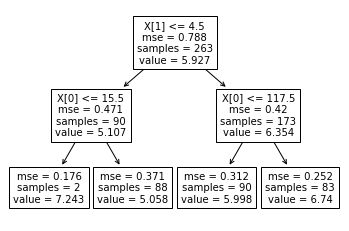

In [5]:
#
# Árbol de regresión en hitters...
#

ar = tree.DecisionTreeRegressor(max_depth = 2)  

# Aplicamos el método en X_train, y_train
ar.fit(X,y)

# Predicción aplicado en X_test.
prediccion = ar.predict(X_test)

tree.plot_tree(ar)


Similar a la figura 8.1 en el capitulo 8.


- A continuación un *intento* de mostrar la varianza en el método al "variar" el train_set. 
Esto estará a discusión. La alta varianza en los métodos de árboles, al "modificar" el train_set la predicción puede ser distinta. 


 Primeras 4 predicciones en X_test ... 
[5.956171   5.956171   6.71719808 5.02411191]  Utilizando X2_train como train_set 
[5.99837985 5.99837985 6.73968692 5.05822803]  El ejemplo inicial, X_train como train_set 


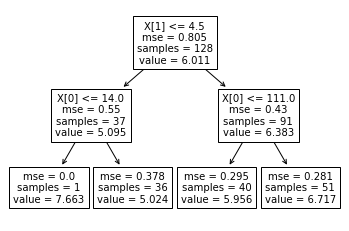

In [38]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X_train, y_train, test_size=0.30)


ar2 = tree.DecisionTreeRegressor(max_depth = 2)  

# Aplicamos el método en X2_train, y2_train
ar2.fit(X2_train,y2_train)

# Predicción aplicado en X_test.
prediccion2 = ar2.predict(X_test)

tree.plot_tree(ar2)

print(" Primeras 4 predicciones en X_test ... ")
print(prediccion2[:4]," Utilizando X2_train como train_set ")
print(prediccion[:4]," El ejemplo inicial, X_train como train_set ")


### + Aplicando Bagging 

In [53]:
# Métricas, MSE.

from sklearn.metrics import mean_squared_error

# MSE  en árbol de regresión 
error_ar = mean_squared_error( y_test, prediccion )

error_ar


0.3026418289760601

In [69]:
#
# Importamos los paquetes para trabajar con Bagging. 
#

from sklearn.ensemble import BaggingRegressor

br = BaggingRegressor( n_estimators = 250 )

# Aplicamos el método en X,y
br.fit(X_train,y_train) 

B_prediccion = br.predict(X_test)

print("Primeras 4 predicciones: ", B_prediccion[:4] )




Primeras 4 predicciones:  [5.93028112 5.64806466 6.95686813 6.51341215]


In [70]:
# MSE en bagging... 

error_br = mean_squared_error( y_test, B_prediccion )
error_br 


0.3018070229756234

- Visualización del Baggin 

### OOB, Out-of-bag. 

In [86]:
oobr = BaggingRegressor( n_estimators = 250, oob_score = True )

# Aplicamos el método en X,y
oobr.fit(X_train,y_train) 

OOB_prediccion = oobr.predict(X_test)

print("Primeras 4 predicciones: ", OOB_prediccion[:4] )


Primeras 4 predicciones:  [5.92776307 5.65738664 6.89791418 6.48157714]


In [87]:
# Error en OOB

error_oob = mean_squared_error(y_test, OOB_prediccion)
error_oob

0.2934406988448933

<h2 style="padding:2%;margin-left:2%; font-size:20px"> 
    <b style="color:green">+</b> Bosque aleatorio (Random forest).
</h2>

In [16]:
# Import de paquetes para trabajar con Random forest. 

from sklearn.ensemble import RandomForestRegressor   # Caso para regresión ...


In [76]:
rf = RandomForestRegressor( n_estimators = 250 ,max_depth = 2 )

rf.fit(X_train,y_train)

rf_prediccion = rf.predict(X_test)

rf_prediccion[:4]

array([5.91429874, 5.91801265, 6.67626196, 5.96883412])

In [77]:
# Error en random forest

error_rf = mean_squared_error( y, rf.predict(X) )
error_rf

0.26291863427265366

In [78]:
# Random forest con OOB
rf_oob = RandomForestRegressor( n_estimators = 250 , oob_score = True )
rf_oob.fit(X_train,y_train)
rfoob_prediccion = rf_oob.predict(X_test)

# Error en random forest con OOB
error_rfoob = mean_squared_error(y, rf_oob.predict(X))
error_rfoob


0.12902653972703046

In [88]:
# Errores juntos. 

# [Error con árbol de regresión, error con Bagging, error con Random forest, error OOB, error Random forest OOB.]
[error_ar, error_br, error_rf, error_oob, error_rfoob]

[0.3026418289760601,
 0.3018070229756234,
 0.26291863427265366,
 0.2934406988448933,
 0.12902653972703046]